# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the os package
import os

# Confirm the current working directory 
os.getcwd()

# Use '\\' while changing the directory 
os.chdir(r"C:\Users\SEXY\Desktop\DSE\Practice Datasets\Loan Prediction")


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(614, 13)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


[]

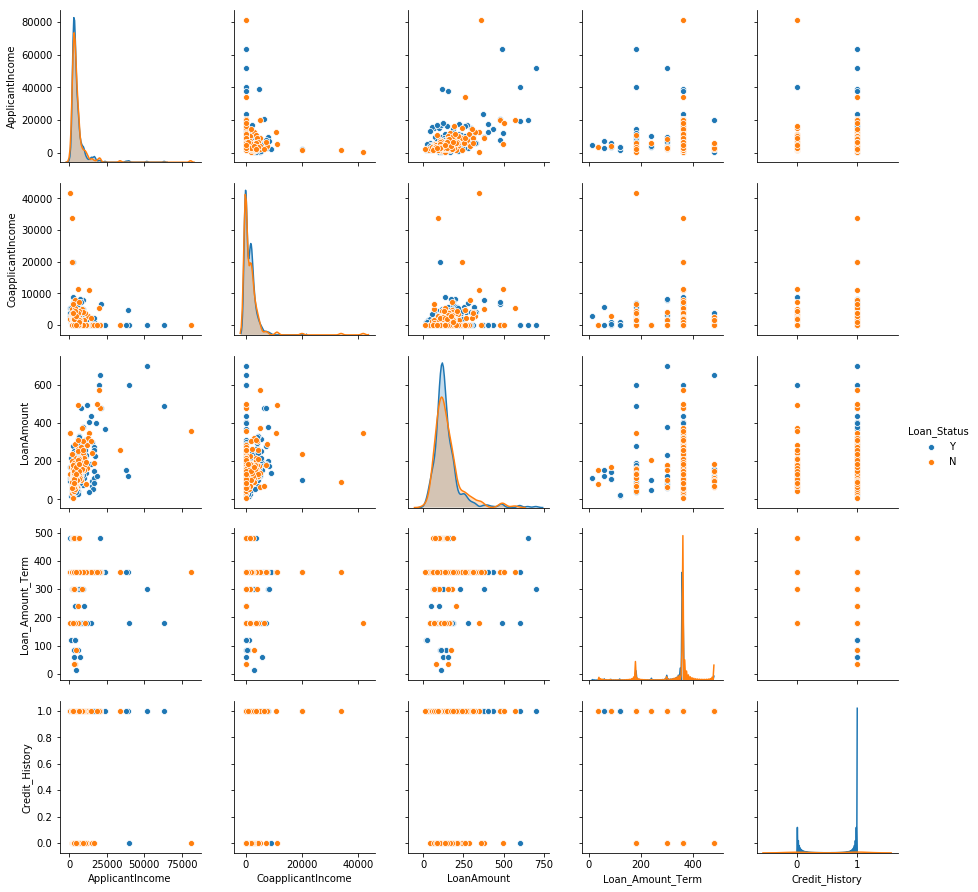

In [7]:
sns.pairplot(train,diag_kind='kde',hue='Loan_Status')
plt.plot()

[]

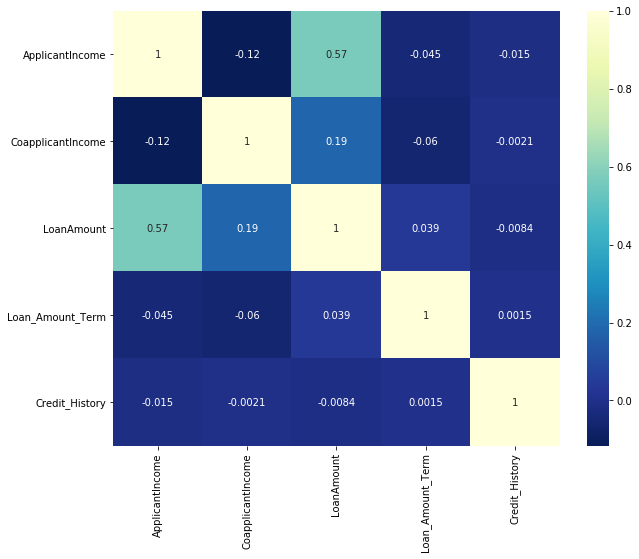

In [12]:
cor = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='YlGnBu_r')
plt.plot()

In [13]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Countplot-Property_Area')

<Figure size 432x288 with 0 Axes>

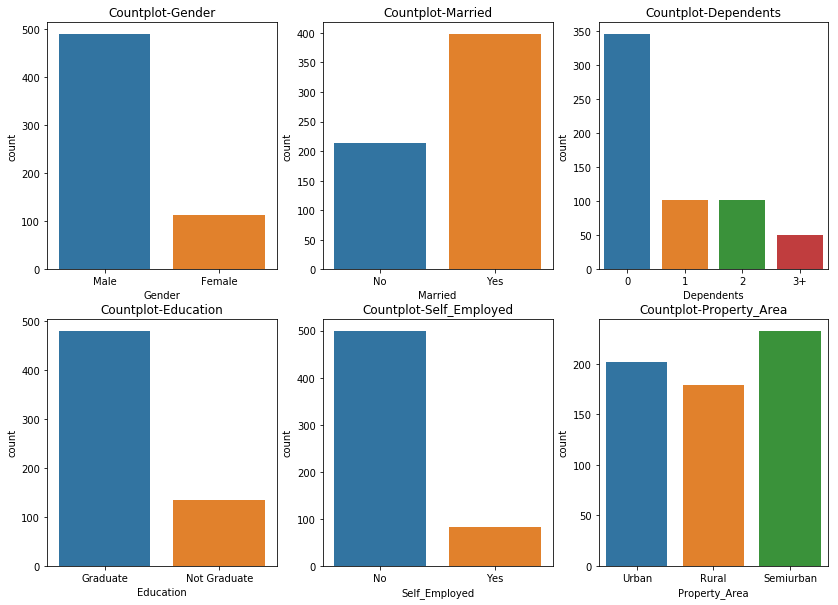

In [14]:
plt.figure(1)
plt.figure(figsize=(14,10))
plt.subplot(231)
sns.countplot(x='Gender',data=train)
plt.title('Countplot-Gender')

plt.subplot(232)
sns.countplot(x='Married',data=train)
plt.title('Countplot-Married')

plt.subplot(233)
sns.countplot(x='Dependents',data=train)
plt.title('Countplot-Dependents')

plt.subplot(234)
sns.countplot(x='Education',data=train)
plt.title('Countplot-Education')

plt.subplot(235)
sns.countplot(x='Self_Employed',data=train)
plt.title('Countplot-Self_Employed')

plt.subplot(236)
sns.countplot(x='Property_Area',data=train)
plt.title('Countplot-Property_Area')



1. More males compare to females
2. Married peoples count is more as compare to unmarried
3. More Graduates
4. Dependency, count of 0 is more

In [15]:
train.Gender.value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

[]

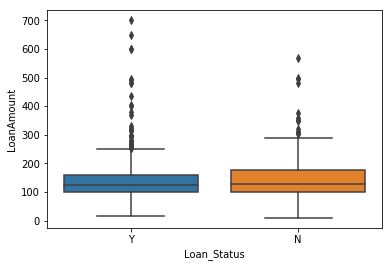

In [16]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=train)
plt.plot()

[]

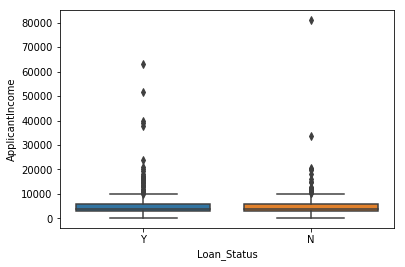

In [17]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train)
plt.plot()

[]

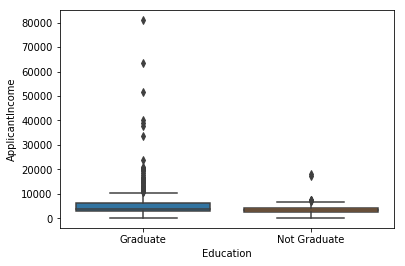

In [18]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)
plt.plot()

[]

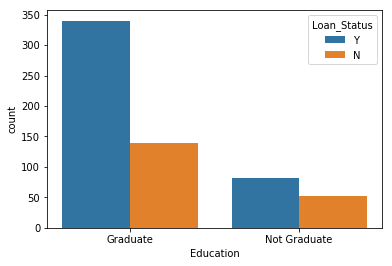

In [19]:
sns.countplot(x='Education', hue='Loan_Status',data=train)
plt.plot()

1. Graduates rate of loan approval is more as compare to non graduates

[]

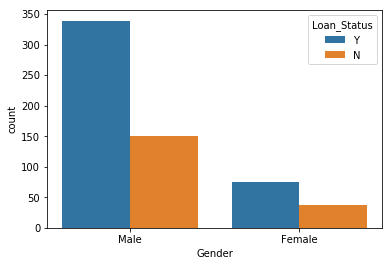

In [20]:
sns.countplot(x='Gender', hue='Loan_Status',data=train)
plt.plot()

1. Males get more loans then females

In [21]:
train[train.Education == 'Graduate']['Credit_History'].value_counts()

1.0    380
0.0     63
Name: Credit_History, dtype: int64

In [22]:
train[train.Education == 'Not Graduate']['Credit_History'].value_counts()

1.0    95
0.0    26
Name: Credit_History, dtype: int64

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [25]:
50/train.shape[0]

0.08143322475570032

In [26]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
train.Dependents.value_counts()#Rectify 3+ to 3

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
train['Dependents'].replace(to_replace='3+', value=3, inplace=True)

In [29]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
train['Gender'].fillna(train.Gender.mode()[0], inplace=True)

In [31]:
train['Married'].fillna(train.Married.mode()[0], inplace=True)
train['Dependents'].fillna(train.Dependents.mode()[0], inplace=True)
train['Self_Employed'].fillna(train.Self_Employed.mode()[0], inplace=True)

In [32]:
train['Gender'].mode()
train.Credit_History.mode()

0    1.0
dtype: float64

In [33]:
#Imputing null values in numerical data
train['LoanAmount'].fillna(train.LoanAmount.median(), inplace=True)
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.median(), inplace=True)
train['Credit_History'].fillna(train.Credit_History.mode()[0], inplace=True)


In [34]:
train['LoanAmount'].median()

128.0

In [35]:
#Imputing null values in test data
test['Gender'].fillna(test.Gender.mode()[0], inplace=True)
test['Dependents'].fillna(test.Dependents.mode()[0], inplace=True)
test['Self_Employed'].fillna(test.Self_Employed.mode()[0], inplace=True)

test['LoanAmount'].fillna(test.LoanAmount.median(), inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.median(), inplace=True)
test['Credit_History'].fillna(test.Credit_History.mode()[0], inplace=True)


In [36]:
#Basic model
x = train.drop(['Loan_ID','Loan_Status'],axis=1)
y = pd.DataFrame(train.pop('Loan_Status'))
test_new = test.drop('Loan_ID', axis=1)

In [37]:
x['Credit_History'] = x['Credit_History'].astype('object')
test_new['Credit_History'] = test_new['Credit_History'].astype('object')

In [38]:
test_new.Credit_History.dtype

dtype('O')

In [39]:
X = pd.get_dummies(x)
X_test = pd.get_dummies(test_new)

In [40]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [41]:
X_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [42]:
from scipy.stats import zscore

In [43]:
X_scaled = X.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [44]:
X_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,...,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.694189e-17,-3.977998e-18,-7.910791e-18,1.795524e-16,3.616362e-17,-6.364796e-17,-1.612897e-16,2.064942e-16,7.919832e-17,1.649061e-16,...,-1.123784e-16,-1.121072e-17,1.121072e-17,5.496870e-17,-1.338054e-16,-1.634595e-16,8.317632e-17,-4.292621e-16,1.330821e-16,6.585395e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,...,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-4.723426e-01,-2.117107e+00,-7.288155e-01,-1.372089e+00,-3.009753e-01,-1.190514e+00,...,-4.437128e-01,-1.892641e+00,-5.283622e-01,-2.547117e+00,-3.926007e-01,-4.117327e-01,-2.428760e+00,-6.414782e-01,-7.820157e-01,-7.002080e-01
25%,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,-4.723426e-01,4.723426e-01,-7.288155e-01,-1.372089e+00,-3.009753e-01,-1.190514e+00,...,-4.437128e-01,5.283622e-01,-5.283622e-01,3.926007e-01,-3.926007e-01,-4.117327e-01,4.117327e-01,-6.414782e-01,-7.820157e-01,-7.002080e-01
50%,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,-4.723426e-01,4.723426e-01,-7.288155e-01,7.288155e-01,-3.009753e-01,8.399735e-01,...,-4.437128e-01,5.283622e-01,-5.283622e-01,3.926007e-01,-3.926007e-01,-4.117327e-01,4.117327e-01,-6.414782e-01,-7.820157e-01,-7.002080e-01
75%,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,-4.723426e-01,4.723426e-01,1.372089e+00,7.288155e-01,-3.009753e-01,8.399735e-01,...,-4.437128e-01,5.283622e-01,-5.283622e-01,3.926007e-01,-3.926007e-01,-4.117327e-01,4.117327e-01,1.558899e+00,1.278747e+00,1.428147e+00
max,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,2.117107e+00,4.723426e-01,1.372089e+00,7.288155e-01,3.322532e+00,8.399735e-01,...,2.253710e+00,5.283622e-01,1.892641e+00,3.926007e-01,2.547117e+00,2.428760e+00,4.117327e-01,1.558899e+00,1.278747e+00,1.428147e+00


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(criterion='entropy',random_state=100)
model3 = RandomForestClassifier(criterion='entropy',random_state=123)

In [46]:
y_pred1 = model1.fit(X_scaled,y).predict(X_test_scaled)

In [47]:
submission_lor = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": y_pred1})
submission_lor.to_csv('submission_lor.csv', index=False)

Logistic regression gives an accuracy of 0.7777.

In [48]:
cd

C:\Users\SEXY


In [49]:
y_pred2 = model2.fit(X_scaled,y).predict(X_test_scaled)
submission_tree = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred2})
submission_tree.to_csv('submission_tree.csv' , index=False)

Decision Tree gives an accuracy of 0.666.

In [50]:
y_pred3 = model3.fit(X_scaled,y).predict(X_test_scaled)
submission_rfc = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred3})
submission_rfc.to_csv('submission_rfc.csv' , index=False)

Random Forest gives an accuracy of 0.75.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

[]

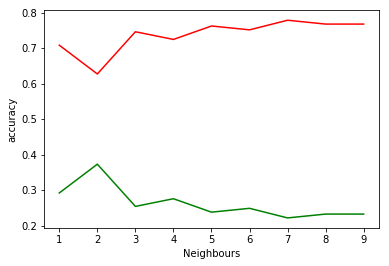

In [53]:
from sklearn.metrics import accuracy_score
accu = []
error = []
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_predict = neigh.predict(x_test)
    accu.append(accuracy_score(y_test,y_predict))
    error.append(1-accuracy_score(y_test,y_predict))
    
    
#plot accuracy vs neighbours graph
plt.plot(range(1,10),accu,'r')
plt.plot(range(1,10),error,'g')
plt.xlabel('Neighbours')
plt.ylabel('accuracy')
plt.plot()

1. The appropriate neighbours for this model is 7

In [54]:
model4 = KNeighborsClassifier(n_neighbors=7)
y_pred4 = model4.fit(X_scaled,y).predict(X_test_scaled)
submission_knn = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred4})
submission_knn.to_csv('submission_knn.csv' , index=False)


KNN gives an accuracy of 0.7702.

# Bagging and Boosting

In [55]:
from sklearn.ensemble import BaggingClassifier

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {
    'bootstrap': [True],
    'max_depth': list(range(1,10)),
    'max_features': list(range(5,22)),
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7,10,20,30]
}    

In [57]:
grid_search = GridSearchCV(estimator = model3, param_grid = param_grid1, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [58]:
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'min_samples_leaf': [3, 4], 'min_samples_split': [5, 10], 'n_estimators': [5, 6, 7, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 7}

In [60]:
best_grid = grid_search.best_estimator_

In [61]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [62]:
y_pred5 = best_grid.predict(X_test)
submission_rfc_GS = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred5})
submission_rfc_GS.to_csv('submission_rfc_GS.csv' , index=False)

With grid search random forest gives accuracy of 0.7702.

# Support vector Machine

In [63]:
from sklearn.svm import SVC

In [64]:
model6 = SVC()
model6.fit(X_scaled,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
y_pred6 = model6.predict(X_test_scaled)
submission_svc = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred6})
submission_svc.to_csv('submission_svc.csv' , index=False)

SVC gives an accuracy of 0.777.

# Decision Tree with Bagging

In [66]:
model7 = BaggingClassifier(base_estimator=model2)
model7.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [67]:
y_pred7 = model7.predict(X_test)
submission_BaggedTree = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status':y_pred7})
submission_BaggedTree.to_csv('submission_BaggedTree.csv' , index=False)

Decision Tree with Bagging gives an accuracy of 0.75